Epoch 1/50 	Loss:0.4959653017968892
Epoch 11/50 	Loss:0.49834490133306764
Epoch 21/50 	Loss:0.49876949853900826
Epoch 31/50 	Loss:0.49877069280807723
Epoch 41/50 	Loss:0.49868805499956964


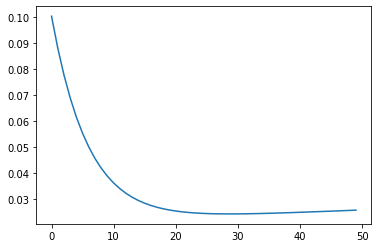

In [3]:
import numpy as np
import matplotlib.pyplot as plt
class NeuralNetwork():
  def __init__(self, input_size, hidden_size, output_size):
    super(NeuralNetwork, self).__init__()
    self.weights_input_to_hidden = np.random.random((input_size, hidden_size))
    self.weights_hidden_to_output = np.random.random((hidden_size, output_size))

  # For Task 2, change the sigmoid function to tan-h and reLU here
  ## TASK 2 CODE STARTS HERE
  def sigmoid(self, x, deriv = False):
    if deriv:
      return x * (1 - x)
    return 1 / (1 + np.exp(-x))
  ## TASK 2 CODE ENDS HERE

  def train(self, train_x, train_y, num_epochs):
    loss_dict = {}
    for epoch in range(num_epochs):
        # Forward prop
        self.l0 = train_x
        self.l1 = self.sigmoid(np.dot(self.l0, self.weights_input_to_hidden))
        l2 = self.sigmoid(np.dot(self.l1, self.weights_hidden_to_output))

        # Backprop
        # Finding final and hidden layer losses
        loss = train_y - l2
        if epoch % 10 == 0:
          print('Epoch {}/{} \tLoss:{}'.format(epoch+1, num_epochs, np.mean(np.abs(loss))))
          #plt.plot(epoch+1,np.mean(loss))
        
        l2_delta = loss * self.sigmoid(l2, deriv = True)
        l1_error = l2_delta.dot(self.weights_hidden_to_output.T)
        l1_delta = l1_error * self.sigmoid(self.l1, deriv = True)
        
        # Optimizing weights
        self.weights_hidden_to_output += self.l1.T.dot(l2_delta)
        self.weights_input_to_hidden += self.l0.T.dot(l1_delta)

        # Store loss in a dictionary
        loss_dict[epoch] = np.abs(np.mean(loss))
    return loss_dict
        
  def test(self, test_x):
    self.l0 = test_x
    self.l1 = self.sigmoid(np.dot(self.l0, self.weights_input_to_hidden))
    output = self.sigmoid(np.dot(self.l1, self.weights_hidden_to_output))
    if output < 0.5:
      return 0
    return output
    # Training Set
arr_x = np.array([[0,0,0],
                [1,1,1],
                [1,0,0],
                [0,0,1],
                [1,1,0],
                [1,0,1]])
arr_y = np.array([[0],
                 [1],
                 [1],
                 [1],
                 [0],
                 [0]])
nn = NeuralNetwork(input_size=3, hidden_size = 1, output_size = 1)
loss = nn.train(train_x = arr_x, train_y = arr_y, num_epochs = 50)
plt.plot(list(loss.keys()),list(loss.values()))


Epoch 1/5000 	Loss:0.8956028170216523
Epoch 1001/5000 	Loss:0.5
Epoch 2001/5000 	Loss:0.5
Epoch 3001/5000 	Loss:0.5
Epoch 4001/5000 	Loss:0.5


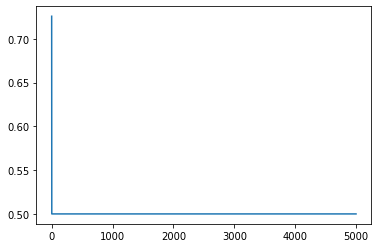

In [15]:
import numpy as np
import matplotlib.pyplot as plt
class NeuralNetwork():
  def __init__(self, input_size, hidden_size, output_size):
    super(NeuralNetwork, self).__init__()
    self.weights_input_to_hidden = np.random.random((input_size, hidden_size))
    self.weights_hidden_to_output = np.random.random((hidden_size, output_size))

  ## TASK 2 CODE STARTS HERE
  # Rectified Linear Unit (ReLU) Function
  def relu(self, x, deriv = False):
    if deriv:
      if x.any() > 0:
        return 1
      else:
        return 0
    else:
      return x * (x > 0)
  ## TASK 2 CODE ENDS HERE

  def train(self, train_x, train_y, num_epochs):
    loss_dict = {}
    for epoch in range(num_epochs):
        # Forward prop
        self.l0 = train_x
        self.l1 = self.relu(np.dot(self.l0, self.weights_input_to_hidden))
        l2 = self.relu(np.dot(self.l1, self.weights_hidden_to_output))

        # Backprop
        # Finding final and hidden layer losses
        loss = train_y - l2
        if epoch % 1000 == 0:
          print('Epoch {}/{} \tLoss:{}'.format(epoch+1, num_epochs, np.mean(np.abs(loss))))
          #plt.plot(epoch+1,np.mean(loss))
        
        l2_delta = loss * self.relu(l2, deriv = True)
        l1_error = l2_delta.dot(self.weights_hidden_to_output.T)
        l1_delta = l1_error * self.relu(self.l1, deriv = True)
        
        # Optimizing weights
        self.weights_hidden_to_output += self.l1.T.dot(l2_delta)
        self.weights_input_to_hidden += self.l0.T.dot(l1_delta)

        # Store loss in a dictionary
        loss_dict[epoch] = np.abs(np.mean(loss))
    return loss_dict
        
  def test(self, test_x):
    self.l0 = test_x
    self.l1 = self.relu(np.dot(self.l0, self.weights_input_to_hidden))
    output = self.relu(np.dot(self.l1, self.weights_hidden_to_output))
    if output < 0.5:
      return 0
    return output
    
nn = NeuralNetwork(input_size=3, hidden_size = 5, output_size = 1)
loss = nn.train(train_x = arr_x, train_y = arr_y, num_epochs = 5000)
plt.plot(list(loss.keys()),list(loss.values()))